In [16]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


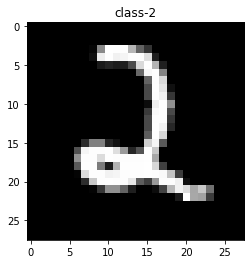

Train image 38033-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6 137 255 254 254 182  99  53   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  15 237 254 241 245 253 253 223  30   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  26  36  28  31  75 217 254 180  31
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 247 253 132
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  99 253 216
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [43]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = 'C:/Users/BIDIT/OneDrive/Documents/Machine Learning/Assignment-1/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

Train data (X) size: (48000, 28, 28), and labels (Y) size: (48000,)
Validation data (X) size: (12000, 28, 28), and labels (Y) size: (12000,)


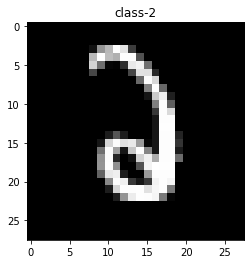

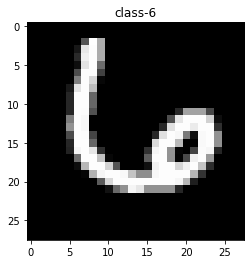

In [44]:
# Your validation set extraction script/code 

# randomised the train dataset and train data labels
temp = list(zip(train_images, train_labels))
np.random.shuffle(temp)
train_images, train_labels = zip(*temp)

train2_image,validation_image = np.split(train_images,[int(0.80 * len(train_images))])
train2_label,validation_label= np.split(train_labels,[int(0.80 * len(train_images))])
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train2_image.shape, train2_label.shape))
print('Validation data (X) size: {}, and labels (Y) size: {}' .format(validation_image.shape, validation_label.shape))


#showing the training dataset and the training label 
plt.title('class-'+str(train2_label[7000]))
plt.imshow(train2_image[7000], cmap = 'gray')
plt.show()


# showing the validation dataset and the validation label
plt.title('class-'+str(validation_label[10]))
plt.imshow(validation_image[10], cmap = 'gray')
plt.show()

In [51]:
# Flattening the numpy array and converting it to float

train2_image= np.array(train2_image.reshape(-1, 28 * 28))
train2_image = train2_image.astype(np.float32) / 255.0
validation_image=np.array(validation_image.reshape(-1,28*28))
validation_image= validation_image.astype(np.float32) / 255.0
print(train2_image.shape)
print(validation_image.shape)

(48000, 784)
(12000, 784)


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [57]:
def compute_distances(X_train, X_test, p):
    """
    Computes the distance between each row of X_test and X_train using the specified distance metric.
    Returns a matrix of shape (num_test, num_train).
    """
    if p == 1:
        distances = np.abs(X_train[:, None] - X_test).sum(axis=2)
    elif p == 2:
        distances = np.sqrt(np.square(X_train[:, None] - X_test).sum(axis=2))
    else:
        distances = np.power(np.abs(X_train[:, None] - X_test), p).max(axis=2)**(1.0/p)
    return distances

In [20]:
# def distance(x, y, p):
#     if p == 1:
#         return np.sum(np.abs(x - y))
#     elif p == 2:
#         return np.sqrt(np.sum((x - y)**2))
#     else:
#         return np.max(np.abs(x - y))

In [58]:
#  k nearest neighbors 
def knn(X_train, y_train, X_test, k=5, p=2):
    distances = compute_distances(X_train, X_test, p)
    idx = np.argsort(distances, axis=1)[:, :k]
    labels = y_train[idx]
    y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=labels)
    return y_pred

In [39]:
# #Test the KNN algorithm on a single test point 
# test_point = validation2_image[2]
# predicted_label = knn(train3_image, train2_label, test_point, 5,2 )
# print('Predicted label:', predicted_label)
# print(validation_label[2])
# print(train4_image.shape)
# print(test_point.shape)

C:\Users\BIDIT\AppData\Local\Temp\ipykernel_8228\3121502383.py:5: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum((x - y)**2))
C:\Users\BIDIT\AppData\Local\Temp\ipykernel_8228\3121502383.py:5: RuntimeWarning: invalid value encountered in subtract
  return np.sqrt(np.sum((x - y)**2))


Predicted label: 2
5
(48000, 784)
(98,)


In [59]:
def accuracy(y_pred, y_true):
    """
    Computes the accuracy of the predicted labels.
    """
    return np.mean(y_pred == y_true) * 100.0

In [61]:
# Compute accuracy as a function of k for fixed p
p = 2
ks = np.arange(1, 22, 2)
accs = [accuracy(knn(train2_image,train2_label, validation_image, k=k, p=p), validation_label) for k in ks]

plt.plot(ks, accs)
plt.title(f"Accuracy vs k for p={p}")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()


MemoryError: Unable to allocate 1.64 TiB for an array with shape (48000, 12000, 784) and data type float32

In [48]:
#Accuracy measurement
def accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true) * 100


In [50]:
# compute accuracy for varying values of k and p
ks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
ps = [1, 2, 3]

accuracies = np.array([[accuracy(knn_predict(train2_image, train2_label, validation_image, k=k, p=p), validation_label) for p in ps] for k in ks])

# plot the accuracy as a function of k and p
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j, p in enumerate(ps):
    ax.plot(ks, [p] * len(ks), accuracies[:, j], label='p={}'.format(p))
ax.set_xlabel('k')
ax.set_ylabel('p')
ax.set_zlabel('Accuracy (%)')
plt.legend()
plt.show()

MemoryError: Unable to allocate 1.64 TiB for an array with shape (12000, 48000, 784) and data type float32

In [41]:
def knnm(X_train, y_train, X_test, k, p):
    # Calculate the distances between the test point and all training points
    distances = np.array([distance(X_train[i], X_test, p) for i in range(X_train.shape[0])])
    # Find the k nearest neighbors and their corresponding labels
    k_nearest_labels = y_train[np.argsort(distances)[:k]]
    # Count the occurrences of each label among the k nearest neighbors
    label_counts = np.bincount(k_nearest_labels)
    # Return the label with the highest count
    return np.argmax(label_counts)

In [42]:
test_point = validation2_image[0]
print(validation_label[0])
k = 5
p_values = [1, 2, 3]
for p in p_values:
    predicted_label = knnm(train3_image, train_labels, test_point, k, p)
    print('Predicted label with p value {}:'.format(p), predicted_label)

6


C:\Users\BIDIT\AppData\Local\Temp\ipykernel_8228\3121502383.py:3: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.abs(x - y))


TypeError: only integer scalar arrays can be converted to a scalar index

In [51]:
# Your k-NN algorithm script/code 


def knn_neighbors(train_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance):
    distances = []
    for index in range(len(train_set)):
        dist = euclidean_distance(test_instance, train_set[index])
        distances.append((train_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors
for i in range(5):
    neighbors = get_neighbors(train2_image, 
                              train2_label, 
                              validation_image[i], 
                              3, 
                              distance=euclidean_distance)
print("Index:         ",i,'\n',
      "Validation set Data:  ",validation_image[i],'\n', 
      "Validation set Label: ",validation_label[i],'\n',
      "neighbours "
      


    

SyntaxError: unexpected EOF while parsing (3524366915.py, line 29)